In [2]:
# Load library
import os 
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
from scipy import signal

In [3]:
# Set path 
Path_Arr = r'C:\Users\MI2RL-KHJ\workspace_signal\mit\20211012_sample\arr'
Path_Arrx = r'C:\Users\MI2RL-KHJ\workspace_signal\mit\20211012_sample\arrx'
Path_Norm = r'C:\Users\MI2RL-KHJ\workspace_signal\mit\20211012_sample\norm'    

In [245]:
np.load(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\norm\ecg_norm_00.npy')

array([-0.035, -0.055, -0.035, ..., -0.065, -0.045, -0.045])

In [4]:
file_arr = os.listdir(Path_Arr)
file_arr_00 = [file for file in file_arr if file.endswith("_00.csv")]

## ecg_nomrm_00

### Check Original Data

In [5]:
file_norm = os.listdir(Path_Norm)
file_norm_00 = [file for file in file_norm if file.endswith("_00.csv")]

In [6]:
file_norm_00

['correct_rpeaks_norm_00.csv',
 'filtered_norm_00.csv',
 'raw_norm_00.csv',
 'templates_norm_00.csv',
 'ts_norm_00.csv',
 'ts_tmpl_norm_00.csv']

In [7]:
cor_rpeak = pd.read_csv(os.path.join(Path_Norm, file_norm_00[0]),header=None) #2960
filtered = pd.read_csv(os.path.join(Path_Norm, file_norm_00[1]),header=None) #460800
raw = pd.read_csv(os.path.join(Path_Norm, file_norm_00[2]),header=None) #460800
tmpl = pd.read_csv(os.path.join(Path_Norm, file_norm_00[3]),header=None) #2960*216
ts = pd.read_csv(os.path.join(Path_Norm, file_norm_00[4]),header=None) #460800
ts_tmpl = pd.read_csv(os.path.join(Path_Norm, file_norm_00[5]),header=None) #216

In [8]:
# lim_rpeak_yvals.index(1.1793204328672875) #48
# tmpl.iloc[0].idxmax(axis = 1, skipna = True)  #tmpl.iloc[0][165], np.max(tmpl.iloc[0]); (0.12211601631080132, 0.12211601631080132)

NameError: name 'lim_rpeak_yvals' is not defined

In [9]:
def flatten(t):
    return [int(item) for sublist in t for item in sublist]

def get_multiple_elements_in_list(in_list, in_indices):
    return [in_list[i] for i in in_indices]

In [65]:
# # tmpl plot
# %matplotlib auto
# plt.plot(tmpl.iloc[0])
# plt.plot(tmpl.iloc[1])
# plt.plot(tmpl.iloc[2])
# plt.plot(tmpl.iloc[3])
# plt.plot(tmpl.iloc[4])
# plt.plot(110, tmpl.iloc[0][165], 'b*')
# plt.plot(165, tmpl.iloc[0][165], 'r*')

Using matplotlib backend: Qt5Agg


In [226]:
# example plot to compare raw data and filtered data 
plt.plot(raw[5000:15000],  linestyle='--', linewidth=1)
plt.plot(filtered[5000:15000],  linestyle='-', linewidth=1)
plt.legend(['Raw', 'Filtered'])
plt.xlabel('Sample points')
plt.ylabel('mV')

Text(0, 0.5, 'mV')

#### Plotting Raw data

In [237]:
# Raw and rpeak data
cor_rpeak[cor_rpeak[0] > 5000]#.index # 51 
cor_rpeak[cor_rpeak[0] < 15000]#.index #147
lim_cor_rpeak = cor_rpeak[51:147][0].tolist()
lim_cor_rpeak = cor_rpeak[51:147][0].tolist()
idx = list(map(int, lim_cor_rpeak)) # idx = flatten(cor_rpeak.values[0:2].tolist())
raw_list = raw[0].tolist()

In [232]:
def get_multiple_elements_in_list(in_list, in_indices):
    return [in_list[i] for i in in_indices]

In [244]:
plt.plot(raw[5000:15000],  linestyle='-', linewidth=1)
plt.plot(idx, get_multiple_elements_in_list (raw_list, idx), 'r*')
plt.legend(['Raw', 'R-peak'])
plt.xlabel('Sample points')
plt.ylabel('mV')

Text(0, 0.5, 'mV')

#### plotting filtered data

In [240]:
# Filtered and rpeak data
cor_rpeak[cor_rpeak[0] > 5000]#.index # 51 
cor_rpeak[cor_rpeak[0] < 15000]#.index #147
lim_cor_rpeak = cor_rpeak[51:147][0].tolist()
idx = list(map(int, lim_cor_rpeak)) # idx = flatten(cor_rpeak.values[0:2].tolist())
filtered_list = filtered[0].tolist()

In [243]:
plt.plot(filtered[5000:15000],  linestyle='-', linewidth=1)
plt.plot(idx, get_multiple_elements_in_list(filtered_list, idx), 'r*')
plt.legend(['Filterd', 'R-peak'])
plt.xlabel('Sample points')
plt.ylabel('mV')

Text(0, 0.5, 'mV')

In [15]:
cor_rpeak[cor_rpeak[0] > 30000].iloc[0]

0    30088.0
Name: 249, dtype: float64

In [16]:
# Filtered and rpeak data
start =cor_rpeak[cor_rpeak[0] > 30000].index[0]
end = cor_rpeak[cor_rpeak[0] < 45000].index[-1]
lim_cor_rpeak = cor_rpeak[start:end][0].tolist()
idx = list(map(int, lim_cor_rpeak)) # idx = flatten(cor_rpeak.values[0:2].tolist())
filtered_list = filtered[0].tolist()

Text(0, 0.5, 'mV')

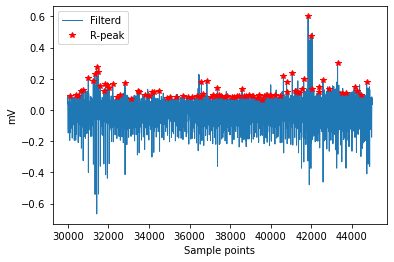

In [17]:
plt.plot(filtered[30000:45000],  linestyle='-', linewidth=1)
plt.plot(idx, get_multiple_elements_in_list (filtered_list, idx), 'r*')
plt.legend(['Filterd', 'R-peak'])
plt.xlabel('Sample points')
plt.ylabel('mV')

#### Normalization

In [21]:
# filtered min-max
np.min(filtered), np.max(filtered)

(0   -1.107434
 dtype: float64,
 0    1.135915
 dtype: float64)

##### Amplitude Normailzation

In [22]:
# Task: amplitude Normalization

# min-max normalization 
min_max_scaler = MinMaxScaler()
# fyvals 

# minmax normalization for fxvals(ECG Voltage)
yvals_MinMax = min_max_scaler.fit_transform(filtered)

# examples
yvals_MinMax[370], yvals_MinMax[662], yvals_MinMax[947]

np.max(yvals_MinMax), np.min(yvals_MinMax), np.max(filtered), np.min(filtered)

(1.0,
 0.0,
 0    1.135915
 dtype: float64,
 0   -1.107434
 dtype: float64)

In [259]:
# import functools
# import itertools
# import operator
# import numpy as np
# #import perfplot

# def itertools_chain(a):
#     return list(itertools.chain.from_iterable(a))

##### Normalzation for sample points using R-R intervals

###### Caculate R-R intervalsm

In [23]:
# Task: 1. R-R interval 나누기 + 3. R-R time frame(data points) Normalization 

# itertools
import functools
import itertools
import operator
import numpy as np
#import perfplot
# signal tools 
from scipy import signal

def itertools_chain(a):
    return list(itertools.chain.from_iterable(a))


# DataFrame: rr-interval + Norm_amplitude_yvalue
def minmax_norm_amplitude(rpeaks, yvals_MinMax):
    df_rr_intervals = pd.DataFrame(columns=['RR_index', 'Origin_Rpeak', 'RR_range_idx', 'RR_interval','Norm_amplitude_yvalue'])
    
    yvals_MinMax = itertools_chain(yvals_MinMax)
    
    for i in range(len(rpeaks)):
        if i + 1 == len(rpeaks):
            #rr_range_idx = i+1
            break
        else:
            origin_rpeak = rpeaks.iloc[i]
            rr_range_idx =[i, i+1]
            # list to str
            rr_range_idx = ','.join(str(e) for e in rr_range_idx)
            rr_interval = rpeaks.iloc[i+1] - rpeaks.iloc[i]
            new_yval = yvals_MinMax[int(rpeaks.iloc[i]):int(rpeaks.iloc[i+1])]
            # new_yval_1d = sum(new_yval.tolist(), [])

            # add data into dictionary(dataframe)
            tmp = pd.DataFrame({'RR_index':i,  'Origin_Rpeak':origin_rpeak, 'RR_range_idx': rr_range_idx, 'RR_interval':rr_interval,'Norm_amplitude_yvalue':[new_yval]})
            # "rr_index: i " means 0:rpeak[1]-rpeak[0]
            
            df_rr_intervals = pd.concat([df_rr_intervals, tmp])
            
    return df_rr_intervals

In [24]:
df = minmax_norm_amplitude(cor_rpeak, yvals_MinMax)

In [25]:
df

,RR_index,Origin_Rpeak,RR_range_idx,RR_interval,Norm_amplitude_yvalue
0,0,110.0,"0,1",93.0,"[0.5417706518706554, 0.5381215106189443, 0.523..."
0,1,203.0,"1,2",94.0,"[0.548086815504595, 0.5458375522748442, 0.5295..."
0,2,297.0,"2,3",94.0,"[0.548824324850647, 0.5429890563946073, 0.5205..."
0,3,391.0,"3,4",97.0,"[0.5514229481617839, 0.5383639126795856, 0.505..."
0,4,488.0,"4,5",109.0,"[0.5502884524609997, 0.5438171913558956, 0.519..."
...,...,...,...,...,...
0,2954,459895.0,"2954,2955",160.0,"[0.5322498809635623, 0.5319782354163556, 0.522..."
0,2955,460055.0,"2955,2956",88.0,"[0.6027942271158092, 0.5983033046308606, 0.552..."
0,2956,460143.0,"2956,2957",287.0,"[0.558978022726707, 0.5554302061736017, 0.5304..."
0,2957,460430.0,"2957,2958",116.0,"[0.5346761121259085, 0.5287756306728173, 0.513..."


In [26]:
df_rr_intervals = df 

###### Normalized Frmae; Sample pointm

In [27]:
# resampling
p_new_yval_1ds = []
point_norm_sample = int(np.median(df_rr_intervals['RR_interval'])) # median=108 #mean=155

for i in range(len(df_rr_intervals)):
    p_new_yval = signal.resample(df_rr_intervals['Norm_amplitude_yvalue'].iloc[i], point_norm_sample)
    p_new_yval_1d = p_new_yval.tolist()
    p_new_yval_1ds.append(p_new_yval_1d)

#norm_df = pd.concat(df_rr_intervals, df_rr_intervals[''])
norm_df = df_rr_intervals.assign(Point_norm_sample = p_new_yval_1ds)

norm_df

# plt.hist(rr_intervals)# np.mean(rr_intervals), np.median(rr_intervals), np.max(rr_intervals)

,RR_index,Origin_Rpeak,RR_range_idx,RR_interval,Norm_amplitude_yvalue,Point_norm_sample
0,0,110.0,"0,1",93.0,"[0.5417706518706554, 0.5381215106189443, 0.523...","[0.5417706518706557, 0.5390732047044269, 0.528..."
0,1,203.0,"1,2",94.0,"[0.548086815504595, 0.5458375522748442, 0.5295...","[0.5480868155045949, 0.5468183994252461, 0.535..."
0,2,297.0,"2,3",94.0,"[0.548824324850647, 0.5429890563946073, 0.5205...","[0.548824324850647, 0.5444499538358629, 0.5281..."
0,3,391.0,"3,4",97.0,"[0.5514229481617839, 0.5383639126795856, 0.505...","[0.5514229481617832, 0.5407621565580057, 0.513..."
0,4,488.0,"4,5",109.0,"[0.5502884524609997, 0.5438171913558956, 0.519...","[0.5502884524610014, 0.5436282986743963, 0.519..."
...,...,...,...,...,...,...
0,2954,459895.0,"2954,2955",160.0,"[0.5322498809635623, 0.5319782354163556, 0.522...","[0.5425613389324274, 0.5250361515922898, 0.513..."
0,2955,460055.0,"2955,2956",88.0,"[0.6027942271158092, 0.5983033046308606, 0.552...","[0.6027942271158093, 0.6043490329885054, 0.571..."
0,2956,460143.0,"2956,2957",287.0,"[0.558978022726707, 0.5554302061736017, 0.5304...","[0.5535446248505203, 0.5043933333071139, 0.364..."
0,2957,460430.0,"2957,2958",116.0,"[0.5346761121259085, 0.5287756306728173, 0.513...","[0.5349959214577653, 0.5278488509733817, 0.511..."


Text(0.5, 1.0, 'Normalized RR-interval: 108 sample points for 156')

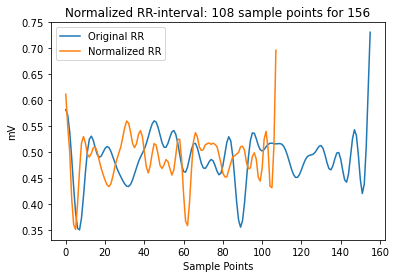

In [28]:
# plot to compare normalized data and original data 
# set i
i = 489

fig, ax = plt.subplots()

ax.plot(list(range(len(norm_df.iloc[i]['Norm_amplitude_yvalue']))), norm_df.iloc[i]['Norm_amplitude_yvalue'], label='Original RR')
ax.legend()
ax.plot(list(range(len(norm_df.iloc[i]['Point_norm_sample']))), norm_df.iloc[i]['Point_norm_sample'], label='Normalized RR')
ax.legend()

ax.set_ylabel('mV')
ax.set_xlabel('Sample Points')
plt.title('Normalized RR-interval: {} sample points for {}'.format(int(np.median(norm_df['RR_interval'])), int(norm_df.iloc[i]['RR_interval'])), fontsize=12)


### Get cosine similarity

In [29]:
# tmp define subject 
Path_Norm
subject= file_norm_00[0].split('.csv')[0].split('rpeaks_')[-1]
Path_Norm

'C:\\Users\\MI2RL-KHJ\\workspace_signal\\mit\\20211012_sample\\norm'

In [30]:
PATH_IN = Path_Norm
os.getcwd()
os.chdir(PATH_IN)
rpeakList = [i for i in os.listdir(PATH_IN) if i.startswith('correct')]
fxvalList = [i for i in os.listdir(PATH_IN) if i.startswith('filtered')]

In [213]:
def cal_cosine_similarity(PATH_IN):
    
    # load data
    os.chdir(PATH_IN)
    rpeakList = [i for i in os.listdir(PATH_IN) if i.startswith('correct')]
    fxvalList = [i for i in os.listdir(PATH_IN) if i.startswith('filtered')]
    
    try: 
        os.mkdir(os.path.join(PATH_IN, 'cosine_sim'))
    except:
        pass
        
    
    for i in range(len(rpeakList)):
        subject= '_'.join(rpeakList[i].split('.')[0].split('_')[-2:])
        rpeaks = pd.read_csv(rpeakList[i], header=None)
        amplitudes = pd.read_csv(fxvalList[i], header=None)

        ## Task: 2. R-R amplitude Normalization
        # min-max normalization 
        min_max_scaler = MinMaxScaler()
        # minmax normalization for fxvals(ECG Voltage)
        amplitudes_MinMax = min_max_scaler.fit_transform(amplitudes)


        # Task: 1. R-R interval 나누기 + 3. R-R time frame(data points) Normalization             
        # Task: 3. R-R time frame(data points) Normalization 
        # Return rr_intervals, yvals
        rr_intervals = []
        y_vals = []
        for i in range(len(rpeaks)):
            if i + 1 == len(rpeaks):
                break
            else:
                rr_interval = rpeaks.iloc[i+1] - rpeaks.iloc[i]
                y_val = amplitudes_MinMax[int(rpeaks.iloc[i]):int(rpeaks.iloc[i+1])]
                rr_intervals.append(int(rr_interval))
                y_vals.append(y_val)

        if len(y_vals) == len(rr_intervals):
            rr_interval_Norm = np.median(rr_intervals)
        else: 
            print("{} Error: Not Same between the length of y_vals and the length of rr_intervals".format(subject))

        # rr_interval_Norm: Reference
        new_yvals = [] # new y-values based on normalized rr interval -> they have sample data ponits
        org_len = []
        for y_val in range(len(y_vals)):
            org_len.append(len(y_vals[y_val]))
            new_yval = signal.resample(y_vals[y_val], int(rr_interval_Norm))
            new_yvals.append(new_yval)

        # make matrix: [len(new_yvals) * len(reference; R-R interval Nromalziation)]
        total_points = []
        median_points = []
        for len_rr_y_values in range(len(new_yvals[0])): # len(new_yvals) = 287
            points = []
            for len_y_values in range(len(new_yvals)): # # len(new_yvals) = 2771 
                point = new_yvals[len_y_values][len_rr_y_values]
                points.append(point)
            total_points.append(points)
            median_points.append(np.median(points))
            #print(total_points)
            break


#         # calculate cosine simmlarities of each point comparing reference(new_yval) 
#         cos_sims = []
#         ref = median_points
#         for new_yval in new_yvals:
#             cos_sim = cosine_similarity(np.array(ref).reshape(1,-1), np.array(new_yval).reshape(1,-1))
#             cos_sims.append(cos_sim)
#             break
            

        # when cos_sims exists over 1600, data makes two lines -> so, we divide cos_sims into each cos_sims dataset with 1000 cos_sims
    #     stems = [list(range(i*1000,(i + 1)*1000)) for i in list(range(divmod(len(cos_sims), 1000)[0]))]
    #     leafs = list(i+1 for i in range(divmod(len(cos_sims), 1000)[1]))


    #     results = subject + ',' +  str(int(rr_interval_Norm)) + ',' +  '; '.join(str(e) for e in org_len_yvals) +  ',' +  '; '.join(str(e) for e in np.concatenate(np.concatenate(cos_sims)).tolist()) + ',' + '\n'
    #     with open (os.path.join(PATH_IN, 'cosine_similarity.csv'), 'a') as f:
    #                f.write(results)


#         # Make Sorted DataFrame and .csv file depending on each subject 
#         df = pd.DataFrame({'index':range(len(cos_sims)), 'cos_sim':np.concatenate(np.concatenate(cos_sims)).tolist(), 'original_points':org_len})#,ascending=False)
#         df_sorted = df.sort_values(by=['cos_sim'], ascending=False)
# #         tmp_index = tmp['index']
#         df_sorted.index= list(range(len(cos_sims)))

#         df_sorted.to_csv(os.path.join(PATH_IN, 'cosine_sim', 'cos_sim_{}_{}.csv'.format(subject, int(rr_interval_Norm))))

        print('{} is done. ; the length of Reference Frame: {}'.format(subject, int(rr_interval_Norm)))
    print("All finished")    
                          

In [214]:
cal_cosine_similarity(PATH_IN)

norm_00 is done. ; the length of Reference Frame: 108
norm_01 is done. ; the length of Reference Frame: 127
norm_02 is done. ; the length of Reference Frame: 99
norm_03 is done. ; the length of Reference Frame: 94
norm_04 is done. ; the length of Reference Frame: 83
norm_05 is done. ; the length of Reference Frame: 123
norm_06 is done. ; the length of Reference Frame: 101
norm_07 is done. ; the length of Reference Frame: 107
norm_08 is done. ; the length of Reference Frame: 92
norm_09 is done. ; the length of Reference Frame: 121


KeyboardInterrupt: 

In [516]:
cal_cosine_similarity(PATH_IN)

norm_00 is done. ; the length of Reference Frame: 108
norm_01 is done. ; the length of Reference Frame: 127
norm_02 is done. ; the length of Reference Frame: 99
norm_03 is done. ; the length of Reference Frame: 94
norm_04 is done. ; the length of Reference Frame: 83
norm_05 is done. ; the length of Reference Frame: 123
norm_06 is done. ; the length of Reference Frame: 101
norm_07 is done. ; the length of Reference Frame: 107
norm_08 is done. ; the length of Reference Frame: 92
norm_09 is done. ; the length of Reference Frame: 121
norm_10 is done. ; the length of Reference Frame: 87
norm_11 is done. ; the length of Reference Frame: 89
norm_12 is done. ; the length of Reference Frame: 96
norm_13 is done. ; the length of Reference Frame: 87
norm_14 is done. ; the length of Reference Frame: 94
norm_15 is done. ; the length of Reference Frame: 112
norm_16 is done. ; the length of Reference Frame: 93
norm_17 is done. ; the length of Reference Frame: 143
All finished


### check the normalized waves to get cut-off value

In [32]:
cos_df = pd.read_csv(os.path.join(PATH_IN, 'cosine_sim', 'cos_sim_norm_00_108.csv'))

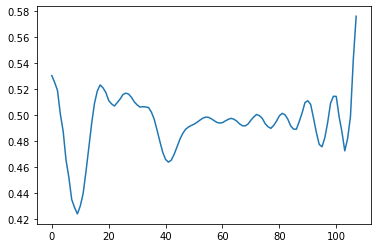

In [33]:
plt.plot(norm_df.iloc[1658]['Point_norm_sample'])

In [184]:
cos_df

,Unnamed: 0,index,cos_sim,original_points
0,0,1658,0.999552,100
1,1,896,0.999480,58
2,2,1107,0.999473,69
3,3,351,0.999435,70
4,4,2765,0.999432,67
...,...,...,...,...
2954,2954,2209,0.980990,89
2955,2955,2160,0.979531,74
2956,2956,2188,0.979326,451
2957,2957,2159,0.978937,73


In [36]:
cutoff_idx_50 = cos_df[0:50]['index']

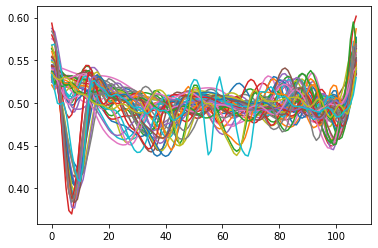

In [38]:
import time
for idx in cutoff_idx_50:
    plt.plot(norm_df.iloc[idx]['Point_norm_sample'])

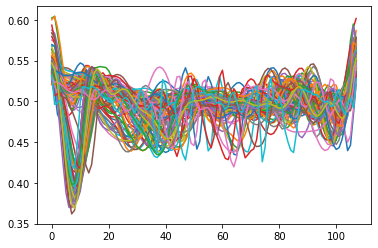

In [39]:
cutoff_idx_100 = cos_df[0:100]['index']
for idx in cutoff_idx_100:
    plt.plot(norm_df.iloc[idx]['Point_norm_sample'])

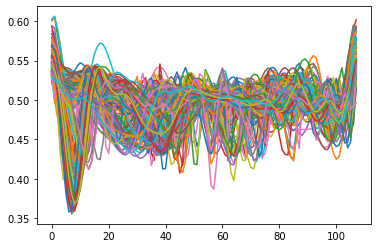

In [40]:
cutoff_idx_200 = cos_df[0:200]['index']
for idx in cutoff_idx_200:
    plt.plot(norm_df.iloc[idx]['Point_norm_sample'])

##### Test

In [49]:
def flatten(t):
    return [item for sublist in t for item in sublist]

In [47]:
norm_value = norm_df.iloc[:]['Point_norm_sample'].values.tolist()

In [152]:
norm_maxs = []
norm_mins = []
for i in range(len(norm_df['Point_norm_sample'])):
    norm_max = np.max(norm_df['Point_norm_sample'].iloc[i])
    norm_min = np.min(norm_df['Point_norm_sample'].iloc[i])
    norm_maxs.append(norm_max)
    norm_mins.append(norm_min)
    

In [157]:
np.max(norm_maxs), np.min(norm_maxs), np.max(norm_mins), np.min(norm_mins)

(0.9512721804075994,
 0.5304591588583296,
 0.48016599890808775,
 -0.007110039518567054)

In [156]:
ampl_mins = []
ampl_maxs = []
for i in range(len(norm_df['Norm_amplitude_yvalue'])):
    ampl_max = np.max(norm_df['Norm_amplitude_yvalue'].iloc[i])
    ampl_min = np.min(norm_df['Norm_amplitude_yvalue'].iloc[i])
    ampl_maxs.append(ampl_max)
    ampl_mins.append(ampl_min)
    

In [159]:
np.max(ampl_maxs), np.min(ampl_maxs), np.max(ampl_mins), np.min(ampl_mins)

(1.0, 0.5300763341648178, 0.4800963589374704, 0.0)

In [51]:
norm_value_1d= flatten(norm_value)

In [53]:
%matplotlib auto
plt.plot(norm_value_1d)

Using matplotlib backend: Qt5Agg


In [104]:
plt.plot(norm_value_1d)

#### plotting Normalzied XY data with r-peak

In [211]:
# find r-peak and values with r-peak depending on resampling rr-interval 

i = len(norm_value_1d) #319572

def rpeak_loc(whole_data):
    return whole_data *int(np.median(norm_df['RR_interval']))

def rpeak_loc_yval(whole_data):
    return norm_value_1d[whole_data *int(np.median(norm_df['RR_interval']))]

target_list = list(range(int(len(norm_value_1d)/108)))
rpeak_= list(map(rpeak_loc, target_list))
rpeak_yval = list(map(rpeak_loc_yval, target_list))

In [138]:
np.max(norm_value_1d), np.min(norm_value_1d)

(0.9512721804075994, -0.007110039518567054)

In [145]:
# plotting
plt.plot(norm_value_1d)
plt.plot(rpeak_, rpeak_yval, 'r*')
plt.legend(['Normalization_XY', 'R-peak'])
plt.ylabel('Normalized y-value [0,1]')
plt.xlabel('Resampled points')                
plt.title('Normalized Amplitude and Resampling based on Reference Frame')

Text(0.5, 1.0, 'Normalized Amplitude and Resampling based on Reference Frame')

In [118]:
len(norm_value_1d)

319572

### Check resampling

In [80]:
plt.plot(norm_value_1d)

In [83]:
norm_value_1d[0]

0.5417706518706557

In [94]:
len(overall_amplitude[110:]),  len(norm_value_1d)

(460690, 319572)

In [90]:
plt.plot(norm_xy_new_yval[110:])

In [ ]:
new_yvals = [] # new y-values based on normalized rr interval -> they have sample data ponits
org_len = []
for y_val in range(len(y_vals)):
    org_len.append(len(y_vals[y_val]))
    new_yval = signal.resample(y_vals[y_val], int(rr_interval_Norm))
    new_yvals.append(new_yval)

In [59]:
for i in range(len(rpeakList)):
    subject= '_'.join(rpeakList[i].split('.')[0].split('_')[-2:])
    rpeaks = pd.read_csv(rpeakList[i], header=None)
    amplitudes = pd.read_csv(fxvalList[i], header=None)

    ## Task: 2. R-R amplitude Normalization
    # min-max normalization 
    min_max_scaler = MinMaxScaler()
    # minmax normalization for fxvals(ECG Voltage)
    amplitudes_MinMax = min_max_scaler.fit_transform(amplitudes)


### Resampling Whole data 영 엉터리...

In [95]:
overall_amplitude = flatten(amplitudes_MinMax.tolist())
point_norm_sample = int(np.median(df_rr_intervals['RR_interval']))
norm_xy_new_yval = signal.resample(overall_amplitude[110:], len(norm_value_1d))

In [97]:
len(norm_xy_new_yval)

319572

In [163]:
# find r-peak and values with r-peak depending on resampling rr-interval 


i = len(norm_xy_new_yval) #319572

def rpeak_loc(whole_data):
    return whole_data *int(np.median(norm_df['RR_interval']))

def rpeak_loc_yval(whole_data):
    return norm_xy_new_yval[whole_data *int(np.median(norm_df['RR_interval']))]

a_target_list = list(range(int(len(norm_value_1d)/108)))
a_rpeak_= list(map(rpeak_loc, target_list))
a_rpeak_yval = list(map(rpeak_loc_yval, target_list))

In [164]:
# plotting
plt.plot(norm_xy_new_yval)
plt.plot(a_rpeak_, a_rpeak_yval, 'r*')
plt.legend(['Normalization_XY', 'R-peak'])
plt.ylabel('Normalized y-value [0,1]')
plt.xlabel('Resampled points')                
plt.title('Normalized Amplitude and Resampling based on Reference Frame')

Text(0.5, 1.0, 'Normalized Amplitude and Resampling based on Reference Frame')

#### sample points with rpeak b/a 20 points

In [222]:
# Whole data plotting
x = list(range(rpeak_[1]-(int(np.median(norm_df['RR_interval']))-20),rpeak_[1]+(int(np.median(norm_df['RR_interval']))+20)))
plt(x, norm_value_1d[x])
plt.plot(rpeak_[1], rpeak_yval[1], 'r*')
plt.legend(['Normalization_XY', 'R-peak'])
plt.ylabel('Normalized y-value')
plt.xlabel('Resampled points')                
plt.title('Normalized Amplitude and Resampling based on Reference Frame')

TypeError: list indices must be integers or slices, not list

In [225]:
#norm_value_1d[x]
x

[20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,


In [ ]:
def rpeak_loc(whole_data):
    return whole_data *int(np.median(norm_df['RR_interval']))


In [178]:
def rpeak_loc(whole_data):
    return whole_data *int(np.median(norm_df['RR_interval']))
def rpeak_loc(whole_data):
    return norm_value_1d[whole_data *int(np.median(norm_df['RR_interval']))-(int(np.median(norm_df['RR_interval']))-20):whole_data *int(np.median(norm_df['RR_interval']))+(int(np.median(norm_df['RR_interval']))+20)]

In [179]:
a_target_list = list(range(int(len(norm_value_1d)/108)))
a_rpeak_= list(map(rpeak_loc, target_list))
a_rpeak_yval = list(map(rpeak_loc_yval, target_list))
a_

In [180]:
len(a_rpeak_[2])

216

In [183]:
# Whole data plotting
plt.plot(rpeak_yval)
plt.plot(rpeak_[0], rpeak_yval[0], 'r*')
plt.legend(['Normalization_XY', 'R-peak'])
plt.ylabel('Normalized y-value')
plt.xlabel('Resampled points')                
plt.title('Normalized Amplitude and Resampling based on Reference Frame')

Text(0.5, 1.0, 'Normalized Amplitude and Resampling based on Reference Frame')